## Lab Introduction
Growing up, everyone has a hero. For many people, that hero was Muhammad Ali. He taught people it was okay to be proud of who they were, at a time when others would not accept that. He showed people how to stand up for their beliefs in the face of oppression and tyranny. He made people value themselves, and encouraged them care for those around them. He showed us what bravery truly meant, how to be a heck of a boxer, and so much more. Every single person who met Muhammad Ali, either in the ring or outside of it, had a motivating story to share about their encounter.

On June 3, 2016, Muhammad Ali passed away at the age of 74 due to septic shock. Thirty years earlier, he was diagnosed with Parkinson's syndrome, a neurodegenerative condition that doctors attributed to his boxing-related brain injuries.

Parkinson's disease itself is a long-term disorder of the nervous system that affects many aspects of a person's mobility over time. It's characterized by shaking, slowed movement, rigidity, dementia, and depression. In 2013, some 53 million people were diagnosed with it, mostly men. Other famous personalities affected by it include actor Michael J. Fox, and olympic cyclist Davis Phinney.

In this lab, you will be applying SVC to the [Parkinson's Data Set](https://archive.ics.uci.edu/ml/datasets/Parkinsons), provided courtesy of UCI's Machine Learning Repository. The dataset was created at the University of Oxford, in collaboration with 10 medical centers around the US, along with Intel who developed the device used to record the primary features of the dataset: speech signals. Your goals for this lab are first to see if it's possible to differentiate between people who have Parkinson's and who don't using SciKit-Learn's support vector classifier, and then to take a first-stab at a naive way of fine-tuning your parameters in an attempt to maximize the accuracy of your testing set.

"I've never really resented hard work because I've always liked it. Up every morning for roadwork. Going to the gymnasium every day at 12 o'clock. I never change my pattern."

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cycle 1

Download the dataset from the link above, then load up the **parkinsons.data** into a variable **X**, being sure to drop the name column.


In [7]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [8]:
X = pd.read_csv('/content/drive/MyDrive/FUNIX Progress/MLP303x_1.1-A_EN/data/parkinsons.data')
X.drop('name', axis = 1, inplace = True)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Splice out the status column into a variable **y** and delete it from **X**.

In [9]:
y = X['status']
X.drop('status', axis = 1, inplace = True)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [10]:
y.unique()

array([1, 0])

Perform a train/test split. **30**% test group size, with a random_state equal to **7**.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (136, 22) (136,)
Test set: (59, 22) (59,)


Create a SVC classifier. Don't specify any parameters, just leave everything as default. Fit it against your training data and then score your testing data with accuracy and F1 score.

In [12]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
yhat = clf.predict(X_test)
yhat[0:5]

array([1, 0, 1, 1, 1])

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.33      0.17      0.22        12
           1       0.81      0.91      0.86        47

    accuracy                           0.76        59
   macro avg       0.57      0.54      0.54        59
weighted avg       0.71      0.76      0.73        59

Confusion matrix, without normalization
[[ 2 10]
 [ 4 43]]


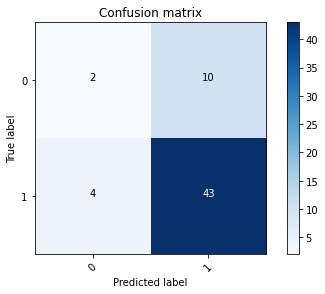

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

## Cycle 2


That accuracy was just too low to be useful. We need to get it up. One way you could go about doing that would be to manually try a bunch of combinations of **C, and gamma values for your rbf kernel**. But that could literally take forever. Also, you might unknowingly skip a pair of values that would have resulted in a very good accuracy.

Instead, lets get the computer to do what computers do best. Program a naive, best-parameter search by creating nested for-loops. The outer for-loop should iterate a variable **C from 0.05 to 2, using 0.05 unit increments**. The inner for-loop should increment a variable **gamma from 0.001 to 0.1, using 0.001 unit increments**. As you know, Python ranges won't allow for float intervals, so you'll have to do some research on NumPy ARanges, if you don't already know how to use them.

Since the goal is to find the parameters that result in the model having the best accuracy score, you'll need a **best_score = 0 variable that you initialize outside of the for-loops.** Inside the inner for-loop, create an SVC model and pass in the C and gamma parameters its class constructor. Train and score the model appropriately. If the current best_score is less than the model's score, update the best_score being sure to print it out, along with the C and gamma values that resulted in it.

After running your lab again, what are the highest accuracy and F1 score you are able to get?

In [17]:
from sklearn.metrics import f1_score

best_score = 0
best_C, best_gamma = 0, 0

for _C in np.arange(0.05, 2, 0.05):
  for _gamma in np.arange(0.001, 0.1, 0.001):
    clf = SVC(C=round(_C, 2), gamma = _gamma).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    score = f1_score(y_test, yhat, average='weighted')
    if (score > best_score):
      best_score = score
      best_C = round(_C, 2)
      best_gamma = round(_gamma, 2)

print("- Best score: {}".format(best_score))
print("- Best C: {}".format(best_C))
print("- Best Gamma: {}".format(best_gamma))

- Best score: 0.9062435235495003
- Best C: 1.65
- Best Gamma: 0.0
